In [1]:
import requests

import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
test_data = {
    'params': {
        'weights': {'type': 'choice', 'parameters': dict(choices=['uniform', 'distance'])},
        'algorithm': {'type': 'choice', 'parameters': dict(choices=['auto', 'ball_tree', 'kd_tree', 'brute'])},
        'p': {'type': 'scalar', 'parameters': dict(lower=1, upper=2)},
        'n_neighbors': {'type': 'scalar', 'parameters': dict(lower=1, upper=15)}        
    },
#     'optimizer': 'GridSearch',
    'optimizer': 'BO',
#     'optimizer': 'RandomSearch',
#     'optimizer': 'OnePlusOne',
}
new_experiment = requests.post('http://127.0.0.1:8001/experiment', json=test_data).json()
new_experiment_id = new_experiment['experiment_id']
print('Experiment id:', new_experiment_id)

target_values = []

for i in range(30):
    asked_point = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/ask').json()
    asked_point['n_neighbors'] = int(asked_point['n_neighbors'])
#     asked_point = {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto'}
    
    clf = KNeighborsClassifier(**asked_point)
    score = cross_val_score(clf, X, y, cv=5).mean()
    error = 1-score
    target_values.append(error)
    print(asked_point, error)
    tell_info = {
        'point': asked_point,
        'value': error
    }
    tell_resp = requests.post(f'http://127.0.0.1:8001/experiment/{new_experiment_id}/tell', json=tell_info).json()
    status = requests.get(f'http://127.0.0.1:8001/experiment/{new_experiment_id}').json()
    print('Status:', status)

Experiment id: 69caf52b-f87b-4e6e-ba16-e69d0eadcbba
{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1.4915305233381704, 'weights': 'distance'} 0.04338749613122883
Status: {'n evaluated points': 1, 'recommended point': {'algorithm': 'brute', 'n_neighbors': 11.000000000000002, 'p': 1.4915305233381704, 'weights': 'distance'}}
{'algorithm': 'brute', 'n_neighbors': 1, 'p': 2.0, 'weights': 'uniform'} 0.0356066233364285
Status: {'n evaluated points': 2, 'recommended point': {'algorithm': 'brute', 'n_neighbors': 1.0, 'p': 1.9999999999999996, 'weights': 'uniform'}}
{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1.3107856142382606, 'weights': 'uniform'} 0.03838440111420616
Status: {'n evaluated points': 3, 'recommended point': {'algorithm': 'brute', 'n_neighbors': 1.0, 'p': 1.9999999999999996, 'weights': 'uniform'}}
{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1.4656941204702676, 'weights': 'uniform'} 0.03505106778087286
Status: {'n evaluated points': 4, 'recommended point': {'algorithm': 'aut

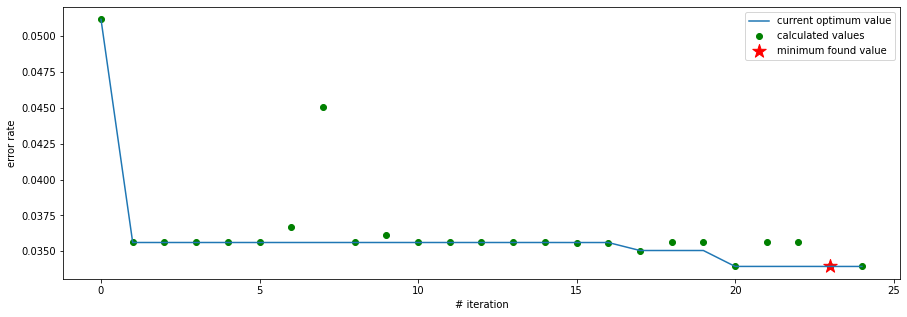

In [10]:
x_iter = list(range(len(target_values[:26])))
y_iter = target_values[:26]

min_y = [min(y_iter[:i+1]) for i in x_iter]
i_min = np.argmin(y_iter)

plt.figure(figsize=(15, 5))
plt.scatter(x_iter, y_iter, c='g', label='calculated values')
plt.plot(x_iter, min_y, label='current optimum value')
plt.scatter(x_iter[i_min], y_iter[i_min], c='r', marker='*', s=200, label='minimum found value')
plt.legend()
plt.xlabel('# iteration')
plt.ylabel('error rate');

In [2]:
import pandas as pd

In [64]:
pd.DataFrame({'n_iteration': x_iter, 'error_rate': y_iter, 'current_best': min_y}).to_csv('real_table.csv', index=False)

In [4]:
df = pd.read_csv('real_table.csv')
df

,n_iteration,error_rate,current_best
0,0,0.051179,0.051179
1,1,0.035607,0.035607
2,2,0.035607,0.035607
3,3,0.035607,0.035607
4,4,0.035607,0.035607
5,5,0.035607,0.035607
6,6,0.036718,0.035607
7,7,0.045059,0.035607
8,8,0.035607,0.035607
9,9,0.036161,0.035607


In [5]:
pd.Series({'n_iteration': 24, 'error_rate': 0.1, 'current_best': 0.1})

n_iteration     24.0
error_rate       0.1
current_best     0.1
dtype: float64

In [9]:
target_values = df.error_rate.values

In [6]:
df = df.append(pd.Series({'n_iteration': 24, 'error_rate': 0.033937, 'current_best': 0.033935}), ignore_index=True)
df

,n_iteration,error_rate,current_best
0,0.0,0.051179,0.051179
1,1.0,0.035607,0.035607
2,2.0,0.035607,0.035607
3,3.0,0.035607,0.035607
4,4.0,0.035607,0.035607
5,5.0,0.035607,0.035607
6,6.0,0.036718,0.035607
7,7.0,0.045059,0.035607
8,8.0,0.035607,0.035607
9,9.0,0.036161,0.035607


In [7]:
df['n_iteration'] = df.n_iteration.astype(int)

In [8]:
df.to_csv('real_table.csv', index=False)

In [62]:
recomm = status['recommended point'].copy()
recomm['n_neighbors'] = round(recomm['n_neighbors'])
recomm

{'algorithm': 'ball_tree',
 'n_neighbors': 3,
 'p': 1.9999999999999996,
 'weights': 'distance'}

In [63]:
clf = KNeighborsClassifier(**recomm)
score = cross_val_score(clf, X, y, cv=5).mean()
score

0.9660646858557722